In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
df= pd.read_csv('/Users/radhikasaxena/Downloads/train.csv')

In [66]:
#used to covert the date column in appropriate date time format
df['date']=pd.to_datetime(df['date'])
#creating a new column day
df['day']=df['date'].dt.day_name()
#min and max date in the data and time delta
print(df['date'].min())
print(df['date'].max())
print(df['date'].max()-df['date'].min())

2013-01-01 00:00:00
2017-08-15 00:00:00
1687 days 00:00:00


In [75]:
df

,id,date,store_nbr,family,sales,onpromotion,day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000,0,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000,0,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000,0,Tuesday
4,4,2013-01-01,1,BOOKS,0.000,0,Tuesday
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Tuesday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Tuesday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Tuesday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Tuesday


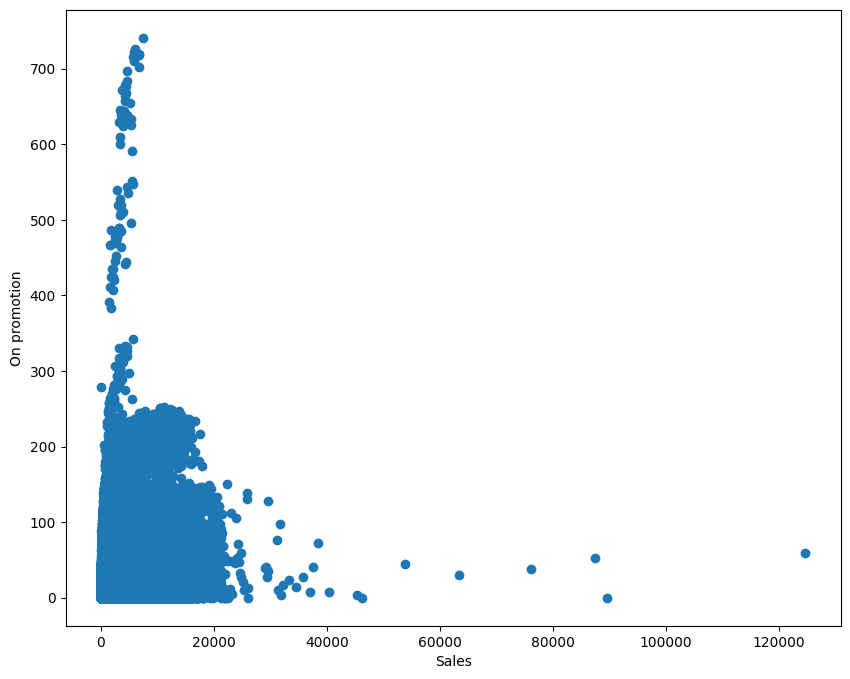

In [67]:
df.set_index('date')
plt.scatter(df['sales'], df['onpromotion'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Sales')
plt.ylabel('On promotion')
plt.show()
#The above plot tells us that we don't have a direct correlation of sales with the amount put on promotion.
#Some output can be seen lower vales of promotion but as we increase the value drastically the sales don't
#increase proportionally

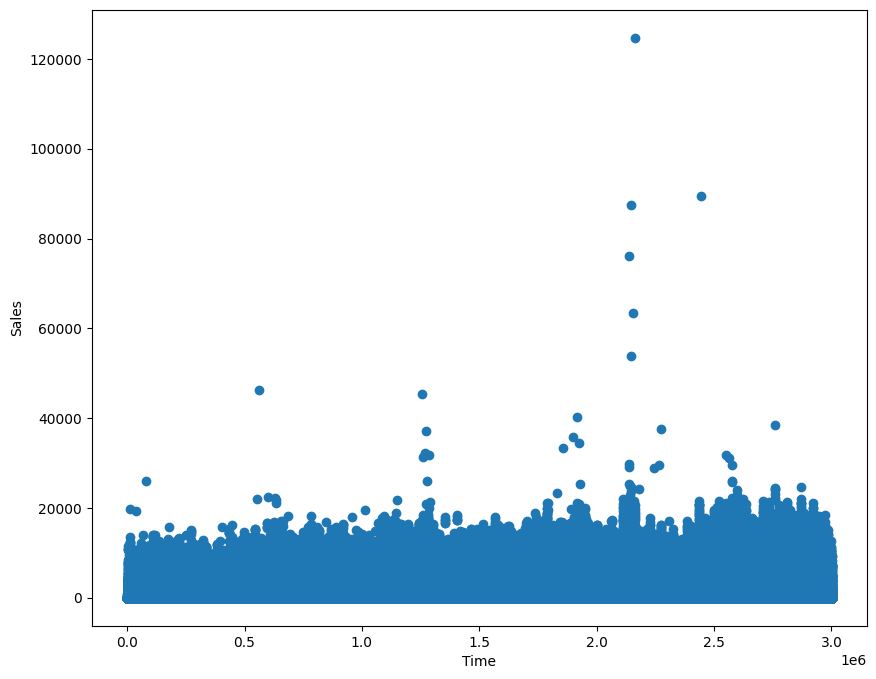

In [68]:
plt.scatter(df['id'], df['sales'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()
#here index of the data is approximated as time
#We can say that over the period of study the sales have a subtle increase

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='sales'>

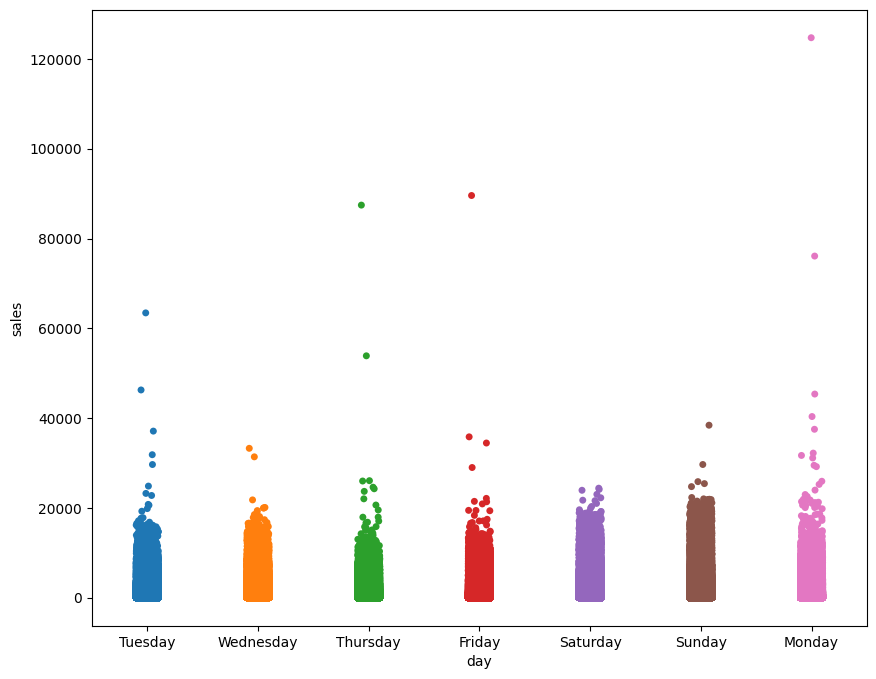

In [71]:
x=df['day']
y=df['sales']
sns.stripplot(x,y)
#We conclude that the sales seem higher on the weekend with the least sales on thursday.

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,3],df.iloc[:,-3],test_size=0.2,random_state=2)
X_train=pd.DataFrame(X_train, columns=['family'])
X_test=pd.DataFrame(X_test, columns=['family'])
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
X_train_new = ohe.fit_transform(X_train[['family']])
X_test_new = ohe.transform(X_test[['family']])



In [146]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train_new, y_train)



LinearRegression()

In [147]:
print(linreg.intercept_)
print(linreg.coef_)

6.09397568380831
[-5.98337705e+00 -2.36469422e+00  2.38212271e+03 -6.02287997e+00
  4.56898776e+02  2.26479694e+00  1.06703248e+03  7.03720016e+02
  2.58890522e+02  1.65629685e+02  1.48874477e+02  3.75798176e+03
  1.54265186e+01 -4.95308452e+00  1.43854395e+01  1.06203179e+01
 -5.63665760e+00  1.70451593e+02  1.08067493e+00 -5.27329013e-02
  1.11559949e+00  7.90594199e+01 -3.16604589e+00  3.35125448e+02
  2.63759351e+02 -2.17549324e+00  1.04775197e-01  3.43652380e+02
  9.09340142e+01  1.34210327e+03 -3.11125441e+00  1.60305748e+01]


In [150]:
y_pred = linreg.predict(X_test_new)

In [155]:
#Mean Absolute Error
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
#Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))
#Root mean squared error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

240.49507423333048
620440.0858556028
787.6801926261716
